In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
class Nodo():
    pasoporaca=0
    ganopasando=0
    hijos=[]
    pos='-1'
    
    def __init__(self):
        pass
    
    def select(self):
        if self.pasoporaca==0 or len(self.hijos)==0:
            self.expand()
            k = play()
            if len(self.hijos)!=0:
                self.hijos[0].ganopasando+=k
                self.hijos[0].pasoporaca+=1
            
            self.ganopasando+=k
            self.pasoporaca+=1
            return k
        else:
            mejor_hijo = sorted(self.hijos,key=lambda i:div(i.ganopasando,i.pasoporaca) )            
            mejor_hijo = mejor_hijo[-1]
            k = mejor_hijo.select()
            self.ganopasando+= k
            self.pasoporaca+=1
            return k
         
    def expand(self):
        if len(self.pos.split("_"))==4:
            return
        self.hijos = create_list_of_nodes(self.pos)
      
        

In [188]:
from random import randint

def play():
    return randint(0,1)

def create_list_of_nodes(p):
    l = []
    for x in range(randint(0,4)):
        l.append(crear_nodo(f"{p}_{x}",0,0,[]))
    return l

def div(w,n):
    
    if n == 0:
        return 50
    else:
        c=2
        return w/n + (c*np.log(ITERACIONES)/n )**.5
    
def crear_nodo(pos,w,n,childs):
    a = Nodo()
    a.pasoporaca = n
    a.ganopasando = w
    a.hijos = childs
    a.pos = pos
    return a

In [189]:
def imprimir(nodo):
    print(nodo.pos)
    #print()
    #print(f"{nodo.ganopasando}/{nodo.pasoporaca}")
    #print()
    for n in nodo.hijos:
        imprimir(n)
def dibujo(nodo):
    print(nodo.pos)
    print()
    print(f"{nodo.ganopasando}/{nodo.pasoporaca}")
    print()
    for n in nodo.hijos:
        imprimir(n)


In [190]:
def redibujar(frase):
    l = frase.split("_")    
    cantidad_espacios=0
    for i,n in enumerate(l):
        cantidad_espacios += width**(max_deep-1-i)*int(n)
        
    print(" "*cantidad_espacios+l[-1])

In [191]:
max_deep=4
width=4
def dibujar(nodo,ax,depth):
    if depth==max_deep or nodo.pasoporaca==0:
        return ax
    
    l = nodo.pos.split("_")   
    
    cantidad_espacios=0
    
    for i,n in enumerate(l):
        cantidad_espacios += width**(max_deep-1-i)*int(n)
    
    xh,yh =cantidad_espacios,max_deep-depth
    xp,yp =cantidad_espacios,max_deep-depth
    if len(l)>1:
        xp,yp =cantidad_espacios-width**(max_deep-1-i)*int(l[-1]),max_deep-depth+1
    
    df = pd.DataFrame({'x':[xh,xp],'y':[yh,yp]})
    
    
    if depth%2!=0:
        ax = df.plot(kind='line',x='x',y='y',ax=ax,c='Orange')
    else:
        ax = df.plot(kind='line',x='x',y='y',ax=ax,c='Blue')
    
    if len(l)>1:
        ax.text(x=xh+(xp-xh)/2, y=yh+(yp-yh)/2, s=f"{nodo.ganopasando}/{nodo.pasoporaca}", alpha=0.7, color='#334f8d')
    
    ax = df.plot(kind='scatter',x='x',y='y',s=3,ax=ax,c='r',legend=None,figsize=(12,6)   ) 
    ax.get_legend().remove()
    for h in nodo.hijos:
        ax = dibujar(h,ax,depth+1)
    return ax
        

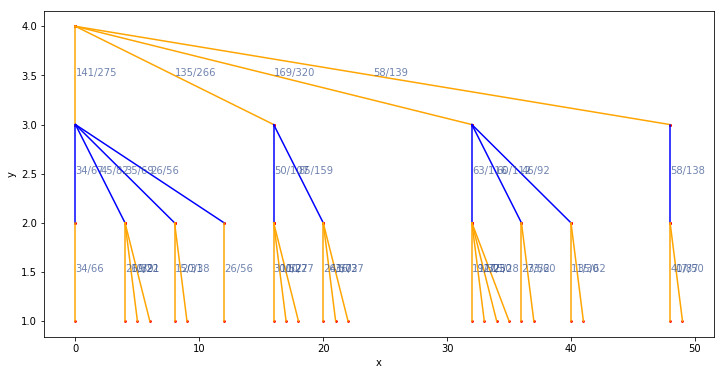

In [192]:
ITERACIONES=1000
r = crear_nodo("0",0,0,[])
for i in range(ITERACIONES):
    r.select()
dibujar(r,None,0)